## Step 1: Import Required Libraries

In [36]:




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler




## Step 2: LOAD THE DATASET(CLEAN ONE)

In [37]:


# Load datasets
data = pd.read_csv("Students_Grading_Dataset.csv")
data.head()







,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Total_Score_Recalculated
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,56.09,F,6.2,No,Yes,High School,Medium,5,4.7,64.090000
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0,67.456801
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,70.30,D,20.7,No,Yes,Master's,Low,6,6.2,74.419500
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,61.63,A,24.8,Yes,Yes,High School,High,3,6.7,71.909500
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,66.13,F,15.4,Yes,Yes,High School,High,2,7.1,69.153000


In [38]:
rows, columns = data.shape
print(f"✅ Number of rows: {rows}")
print(f"✅ Number of columns: {columns}")


✅ Number of rows: 5000
✅ Number of columns: 24


In [39]:


# Strip whitespace from column names just in case
data.columns = data.columns.str.strip()

# Show first few rows
print(data.head())

# Basic info and stats
print(data.info())
print(data.describe(include='all'))

  Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  Total_Score  \
0  Engineering           52.29          55.03        57.82  ...        56.09   
1  Engineering           97.27          97.23        45.80  ...        50.64   
2     Business           57.19          67.05        93.68  ...        70.30   
3  Mathematics           95.15          47.79        80.63  ...        61.63   
4           CS           54.18          46.59        78.89  ...        66.13   

   Grade  Study_Hours_per_Week  Extracurricular_Activities  \
0     

In [40]:
print(data[['Midterm_Score', 'Assignments_Avg', 'Projects_Score', 'Quizzes_Avg', 'Participation_Score', 'Attendance (%)']].isnull().sum())


Midterm_Score          0
Assignments_Avg        0
Projects_Score         0
Quizzes_Avg            0
Participation_Score    0
Attendance (%)         0
dtype: int64


In [41]:
cols_to_impute = ['Assignments_Avg', 'Attendance (%)']

for col in cols_to_impute:
    data[col] = data[col].fillna(data[col].mean())



In [42]:
# Recalculate Total_Score using a weighted average
data['Total_Score_Recalculated'] = (
    0.2 * data['Midterm_Score'] +
    0.3 * data['Final_Score'] +
    0.15 * data['Assignments_Avg'] +
    0.1 * data['Quizzes_Avg'] +
    0.15 * data['Projects_Score'] +
    0.05 * data['Participation_Score'] +
    0.05 * data['Attendance (%)']
)

In [43]:
data[['Total_Score', 'Total_Score_Recalculated']].head(10)


,Total_Score,Total_Score_Recalculated
0,56.09,64.090000
1,50.64,67.456801
2,70.30,74.419500
3,61.63,71.909500
4,66.13,69.153000
5,62.08,58.943070
6,83.21,79.533500
7,81.93,69.698000
8,95.62,76.761000
9,84.99,82.527500


In [44]:
data.to_csv("Students_Grading_Dataset.csv", index=False)


In [45]:
data = pd.read_csv("Students_Grading_Dataset.csv")
data.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Total_Score_Recalculated
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,56.09,F,6.2,No,Yes,High School,Medium,5,4.7,64.090000
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0,67.456801
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,70.30,D,20.7,No,Yes,Master's,Low,6,6.2,74.419500
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,61.63,A,24.8,Yes,Yes,High School,High,3,6.7,71.909500
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,66.13,F,15.4,Yes,Yes,High School,High,2,7.1,69.153000


C:\Users\Admin\AppData\Local\Temp\ipykernel_19928\2638255178.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values[:15], y=correlation.index[:15], palette="viridis")


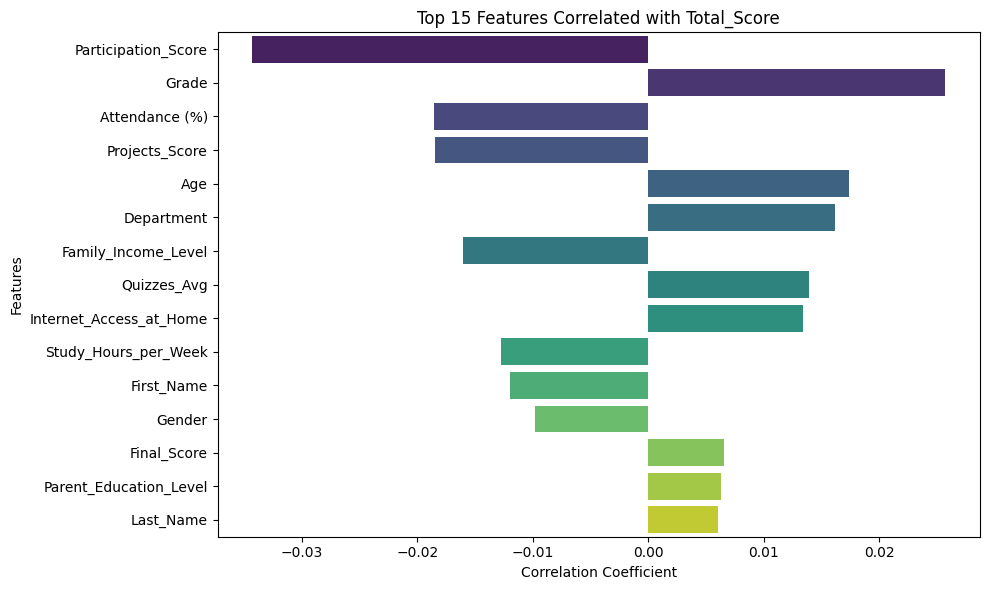

In [46]:
# Step 1: Load your dataset (if not already loaded)
data = pd.read_csv("Students_Grading_Dataset.csv")

# Step 2: Make a copy of the dataset
data_copy = data.copy()

# Step 3: Encode categorical columns into numeric values
for col in data_copy.select_dtypes(include=['object', 'category']).columns:
    data_copy[col] = pd.factorize(data_copy[col])[0]

# Step 4: Fill missing values in numeric columns (optional but safe)
data_copy = data_copy.fillna(data_copy.mean(numeric_only=True))

# Step 5: Compute correlation with Total_Score
correlation = data_copy.corr(numeric_only=True)['Total_Score'].drop('Total_Score')
correlation = correlation.sort_values(key=abs, ascending=False)

# Step 6: Plot the top 15 correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values[:15], y=correlation.index[:15], palette="viridis")
plt.title('Top 15 Features Correlated with Total_Score')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19928\3271470567.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values[:15], y=importances.index[:15], palette="mako")


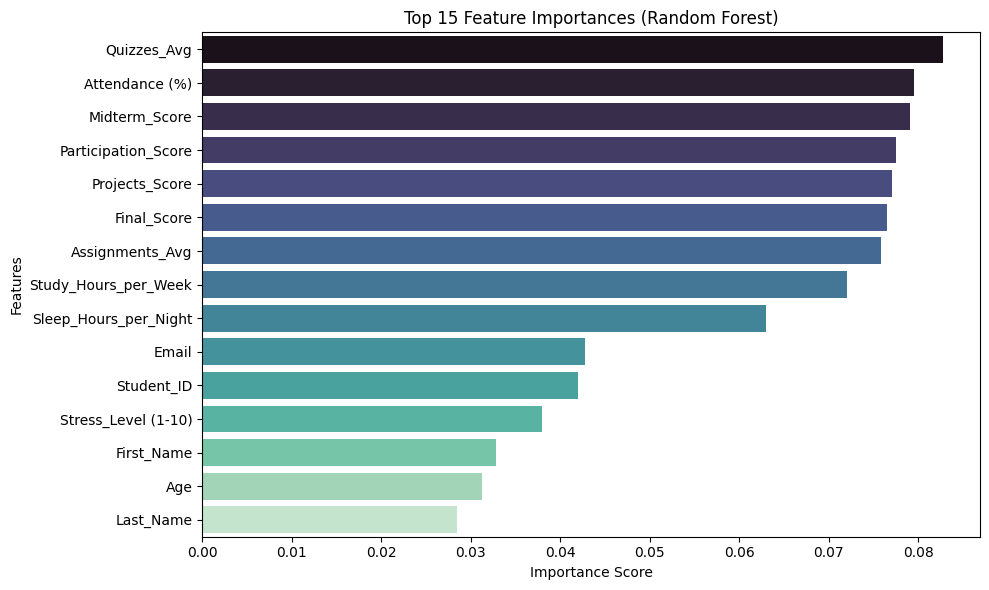

In [47]:
# Define features (X) and target (y)
X = data_copy.drop(columns=['Total_Score', 'Total_Score_Recalculated'])  # exclude targets
y = data_copy['Total_Score']  # or 'Total_Score_Recalculated'

# Split dataset into train and test sets (e.g., 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Plot top 15 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values[:15], y=importances.index[:15], palette="mako")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19928\590993437.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


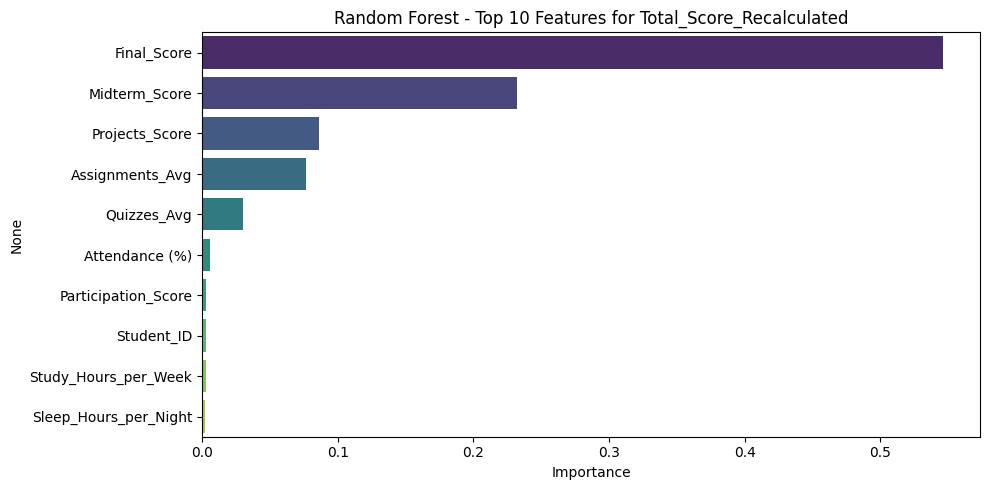

C:\Users\Admin\AppData\Local\Temp\ipykernel_19928\590993437.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


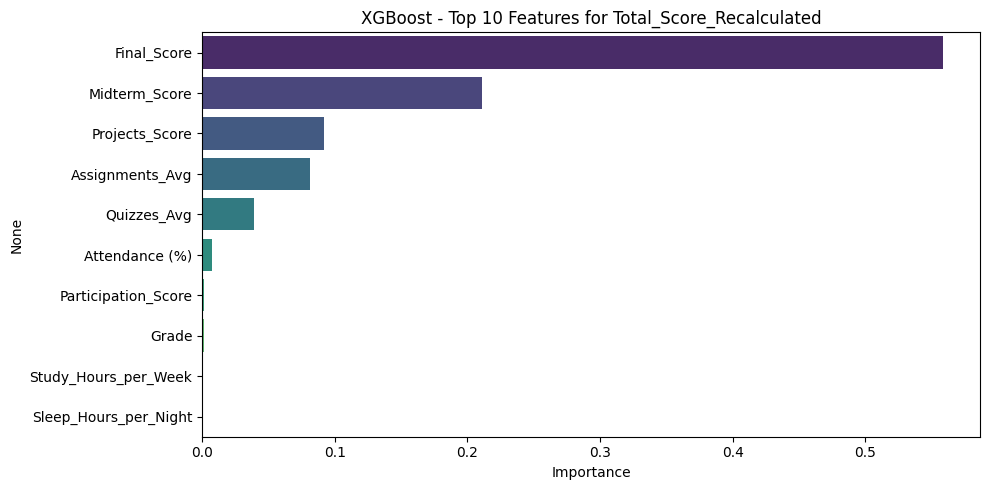

C:\Users\Admin\AppData\Local\Temp\ipykernel_19928\590993437.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


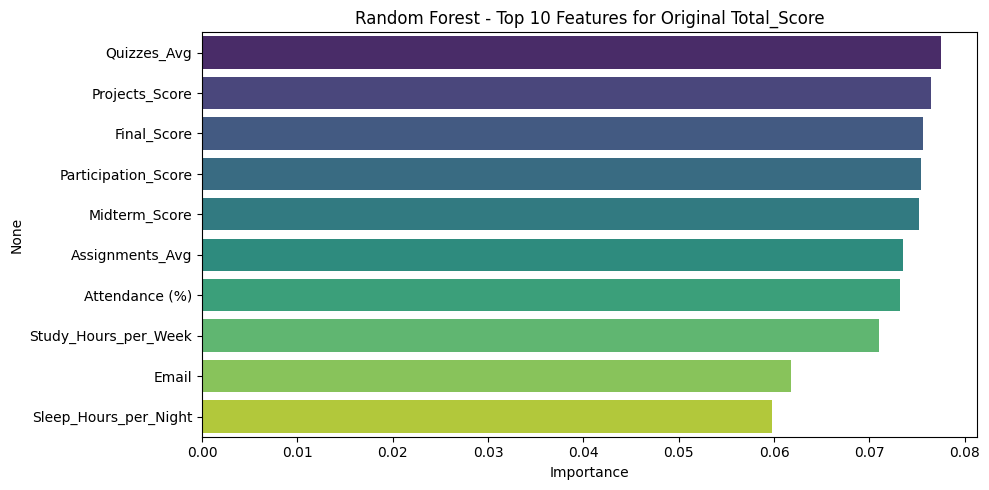

C:\Users\Admin\AppData\Local\Temp\ipykernel_19928\590993437.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


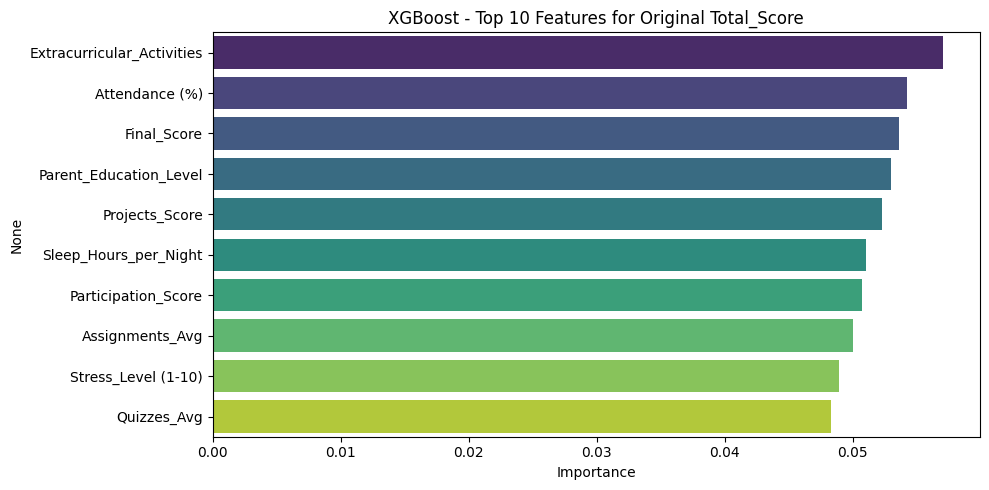

In [48]:
from xgboost import XGBRegressor

# Encode categorical variables
cat_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])# Step 3: Split data
X = data.drop(columns=['Total_Score', 'Total_Score_Recalculated'])
y1 = data['Total_Score']
y2 = data['Total_Score_Recalculated']

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Step 4: Train models and get feature importances

def get_feature_importance(model, X, y):
    model.fit(X, y)
    importances = pd.Series(model.feature_importances_, index=X.columns)
    return importances.sort_values(ascending=False)

rf_importance_recalc = get_feature_importance(RandomForestRegressor(random_state=42), X_train, y2_train)
xgb_importance_recalc = get_feature_importance(XGBRegressor(random_state=42), X_train, y2_train)

rf_importance_orig = get_feature_importance(RandomForestRegressor(random_state=42), X_train, y1_train)
xgb_importance_orig = get_feature_importance(XGBRegressor(random_state=42), X_train, y1_train)

# Step 5: Plot top 10 important features for each target

def plot_feature_importance(importances, title):
    top_features = importances.head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_importance_recalc, "Random Forest - Top 10 Features for Total_Score_Recalculated")
plot_feature_importance(xgb_importance_recalc, "XGBoost - Top 10 Features for Total_Score_Recalculated")

plot_feature_importance(rf_importance_orig, "Random Forest - Top 10 Features for Original Total_Score")
plot_feature_importance(xgb_importance_orig, "XGBoost - Top 10 Features for Original Total_Score")

In [57]:
data['Assessment_Score_Avg'] = data[['Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Projects_Score']].mean(axis=1)
data['Engagement_Score'] = data[['Attendance (%)', 'Participation_Score', 'Study_Hours_per_Week']].mean(axis=1)




In [58]:
print(data[['Assessment_Score_Avg', 'Engagement_Score']].head())


   Assessment_Score_Avg  Engagement_Score
0                71.406         20.826667
2                77.584         27.646667
3                76.022         42.163333
4                74.890         25.183333
5                62.654         30.103803


In [50]:
# Load your cleaned dataset (make sure it includes 'Total_Score_Recalculated')
data = pd.read_csv("Students_Grading_Dataset.csv")
data.columns = data.columns.str.strip()

# Drop rows with missing values (if any)
data = data.dropna()

# Recalculate the total score if not done already (optional)
data['Total_Score_Recalculated'] = (
    0.2 * data['Midterm_Score'] +
    0.3 * data['Final_Score'] +
    0.15 * data['Assignments_Avg'] +
    0.1 * data['Quizzes_Avg'] +
    0.15 * data['Projects_Score'] +
    0.05 * data['Participation_Score'] +
    0.05 * data['Attendance (%)']
)

# Define target and features
y = data['Total_Score_Recalculated']

# Drop columns that shouldn't be features
X = data.drop(columns=[
    'Total_Score',               # Original incorrect target
    'Total_Score_Recalculated', # Corrected target, so remove from features
    'Student_ID', 'First_Name', 'Last_Name', 'Email'  # Identifiers
])

# Define categorical and numeric columns
categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities',
                    'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Grade']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Create full pipeline with Random Forest regressor
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline for later use
joblib.dump(pipeline, "student_performance_pipeline.joblib")

print("✅ Model trained on recalculated total score and saved successfully.")


✅ Model trained on recalculated total score and saved successfully.


In [51]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 15, 20],
    'regressor__min_samples_split': [5, 10],
    'regressor__min_samples_leaf': [2, 4, 6],
    'regressor__max_features': ['sqrt', 'log2']
}


# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model and parameters
print("✅ Best Parameters:", grid_search.best_params_)
print("🏆 Best Score (Negative MSE):", grid_search.best_score_)

# Save the best pipeline
joblib.dump(grid_search.best_estimator_, "student_performance_best_pipeline.joblib")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best Parameters: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}
🏆 Best Score (Negative MSE): -5.789734191799874


['student_performance_best_pipeline.joblib']

In [53]:
import pandas as pd

# Create a dictionary of metrics
metrics = {
    'Metric': ['R² Score', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'],
    'Value': [r2, mae, rmse]
}

# Convert to DataFrame for neat display
performance_df = pd.DataFrame(metrics)

print(performance_df)


                           Metric     Value
0                        R² Score  0.895557
1       Mean Absolute Error (MAE)  1.852805
2  Root Mean Squared Error (RMSE)  2.288399


In [54]:
# Predict on training set
y_train_pred = best_model.predict(X_train)

# Compute training metrics
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Display training vs test comparison
performance_comparison = pd.DataFrame({
    'Metric': ['R²', 'MAE', 'RMSE'],
    'Training': [r2_train, mae_train, rmse_train],
    'Test': [r2, mae, rmse]
})

print(performance_comparison)


  Metric  Training      Test
0     R²  0.971684  0.895557
1    MAE  0.920860  1.852805
2   RMSE  1.182145  2.288399


C:\Users\Admin\AppData\Local\Temp\ipykernel_19928\124864656.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


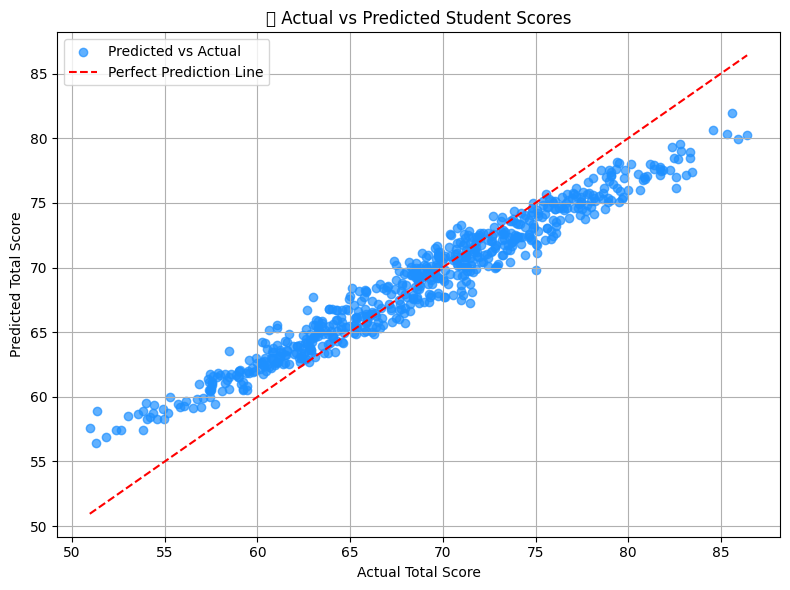

In [55]:
import matplotlib.pyplot as plt

# Predict on test set (if not done already)
y_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='dodgerblue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("📈 Actual vs Predicted Student Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_19928\283468156.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


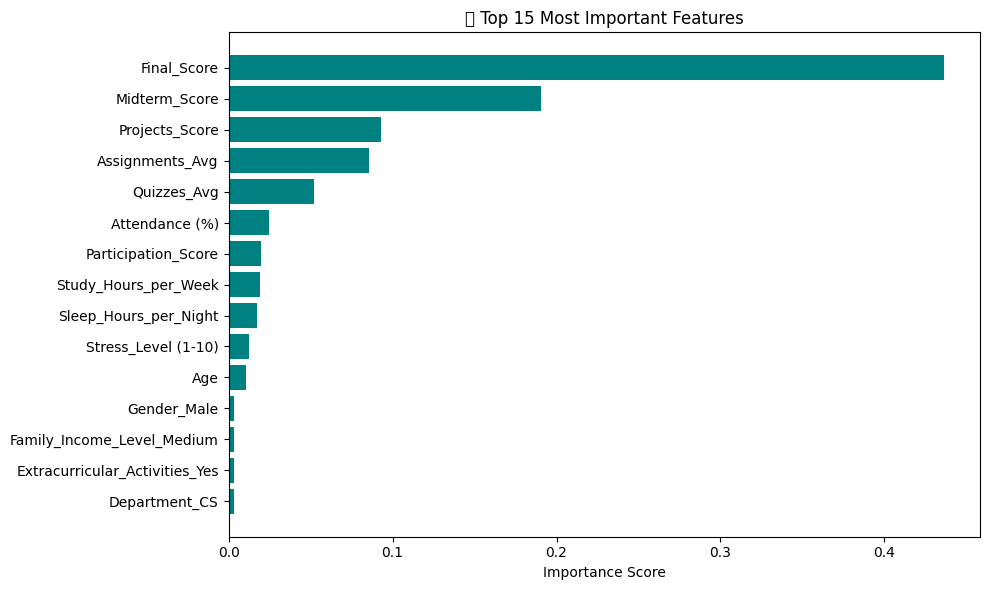

In [ ]:
# Extract the actual trained regressor from the pipeline
regressor = best_model.named_steps['regressor']  

# Get feature names from preprocessor
# Get column transformer
preprocessor = best_model.named_steps['preprocessing']
# Get categorical + numeric transformed feature names
categorical_cols = preprocessor.transformers_[0][2]
numeric_cols = preprocessor.transformers_[1][2]

# Get one-hot encoded feature names
ohe = preprocessor.transformers_[0][1]  # OneHotEncoder
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Combine all feature names
feature_names = list(ohe_feature_names) + list(numeric_cols)

# Get importances and sort
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices[:15])), importances[indices[:15]][::-1], color='teal')
plt.yticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]][::-1])
plt.xlabel("Importance Score")
plt.title("📊 Top 15 Most Important Features")
plt.tight_layout()
plt.show()


In [59]:
# Numeric summary
print(data.describe())

# Categorical summary
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())


               Age  Attendance (%)  Midterm_Score  Final_Score  \
count  3206.000000     3206.000000    3206.000000  3206.000000   
mean     21.039925       75.395996      70.048958    69.445165   
std       1.996322       13.509315      17.089972    17.210758   
min      18.000000       50.010000      40.010000    40.000000   
25%      19.000000       64.815000      55.442500    54.460000   
50%      21.000000       75.431409      70.025000    69.295000   
75%      23.000000       85.860000      84.487500    84.102500   
max      24.000000      100.000000      99.980000    99.980000   

       Assignments_Avg  Quizzes_Avg  Participation_Score  Projects_Score  \
count      3206.000000  3206.000000          3206.000000     3206.000000   
mean         75.147675    74.787645             5.004766       74.853624   
std          13.634826    14.601180             2.869489       14.452116   
min          50.000000    50.030000             0.000000       50.010000   
25%          64.140000   

In [62]:
rows, columns = data.shape
print(f"✅ Number of rows: {rows}")
print(f"✅ Number of columns: {columns}")


✅ Number of rows: 3206
✅ Number of columns: 26


In [63]:
print(data.columns.tolist())


['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night', 'Total_Score_Recalculated', 'Assessment_Score_Avg', 'Engagement_Score']


In [67]:
# Get only numeric columns
numeric_data = data.select_dtypes(include='number')

# Descriptive stats with transposed layout
numeric_stats = numeric_data.describe().T

# Add median manually
numeric_stats['median'] = numeric_data.median()

# Reorder columns for clarity
numeric_stats = numeric_stats[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]

# Show the stats
print("📊 Numeric Feature Summary:")
print(numeric_stats)



📊 Numeric Feature Summary:
                           count       mean     median        std       min  \
Age                       3206.0  21.039925  21.000000   1.996322  18.00000   
Attendance (%)            3206.0  75.395996  75.431409  13.509315  50.01000   
Midterm_Score             3206.0  70.048958  70.025000  17.089972  40.01000   
Final_Score               3206.0  69.445165  69.295000  17.210758  40.00000   
Assignments_Avg           3206.0  75.147675  74.798673  13.634826  50.00000   
Quizzes_Avg               3206.0  74.787645  74.475000  14.601180  50.03000   
Participation_Score       3206.0   5.004766   5.000000   2.869489   0.00000   
Projects_Score            3206.0  74.853624  74.930000  14.452116  50.01000   
Total_Score               3206.0  75.104828  75.355000  14.406935  50.03000   
Study_Hours_per_Week      3206.0  17.658484  17.400000   7.276542   5.00000   
Stress_Level (1-10)       3206.0   5.459139   5.000000   2.855225   1.00000   
Sleep_Hours_per_Night    

In [66]:
categorical_summary = {}

for col in categorical_cols:
    print(f"\n📌 {col} Value Counts:")
    print(data[col].value_counts())
    
    print(f"\n📊 {col} Proportions:")
    print(data[col].value_counts(normalize=True).round(3))



📌 Gender Value Counts:
Gender
Male      1641
Female    1565
Name: count, dtype: int64

📊 Gender Proportions:
Gender
Male      0.512
Female    0.488
Name: proportion, dtype: float64

📌 Department Value Counts:
Department
CS             1298
Engineering     946
Business        648
Mathematics     314
Name: count, dtype: int64

📊 Department Proportions:
Department
CS             0.405
Engineering    0.295
Business       0.202
Mathematics    0.098
Name: proportion, dtype: float64

📌 Extracurricular_Activities Value Counts:
Extracurricular_Activities
No     2239
Yes     967
Name: count, dtype: int64

📊 Extracurricular_Activities Proportions:
Extracurricular_Activities
No     0.698
Yes    0.302
Name: proportion, dtype: float64

📌 Internet_Access_at_Home Value Counts:
Internet_Access_at_Home
Yes    2873
No      333
Name: count, dtype: int64

📊 Internet_Access_at_Home Proportions:
Internet_Access_at_Home
Yes    0.896
No     0.104
Name: proportion, dtype: float64

📌 Parent_Education_Level Valu

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert cv_results_ to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Convert scores to positive MSE (since GridSearchCV used 'neg_mean_squared_error')
results['mean_MSE'] = -results['mean_test_score']


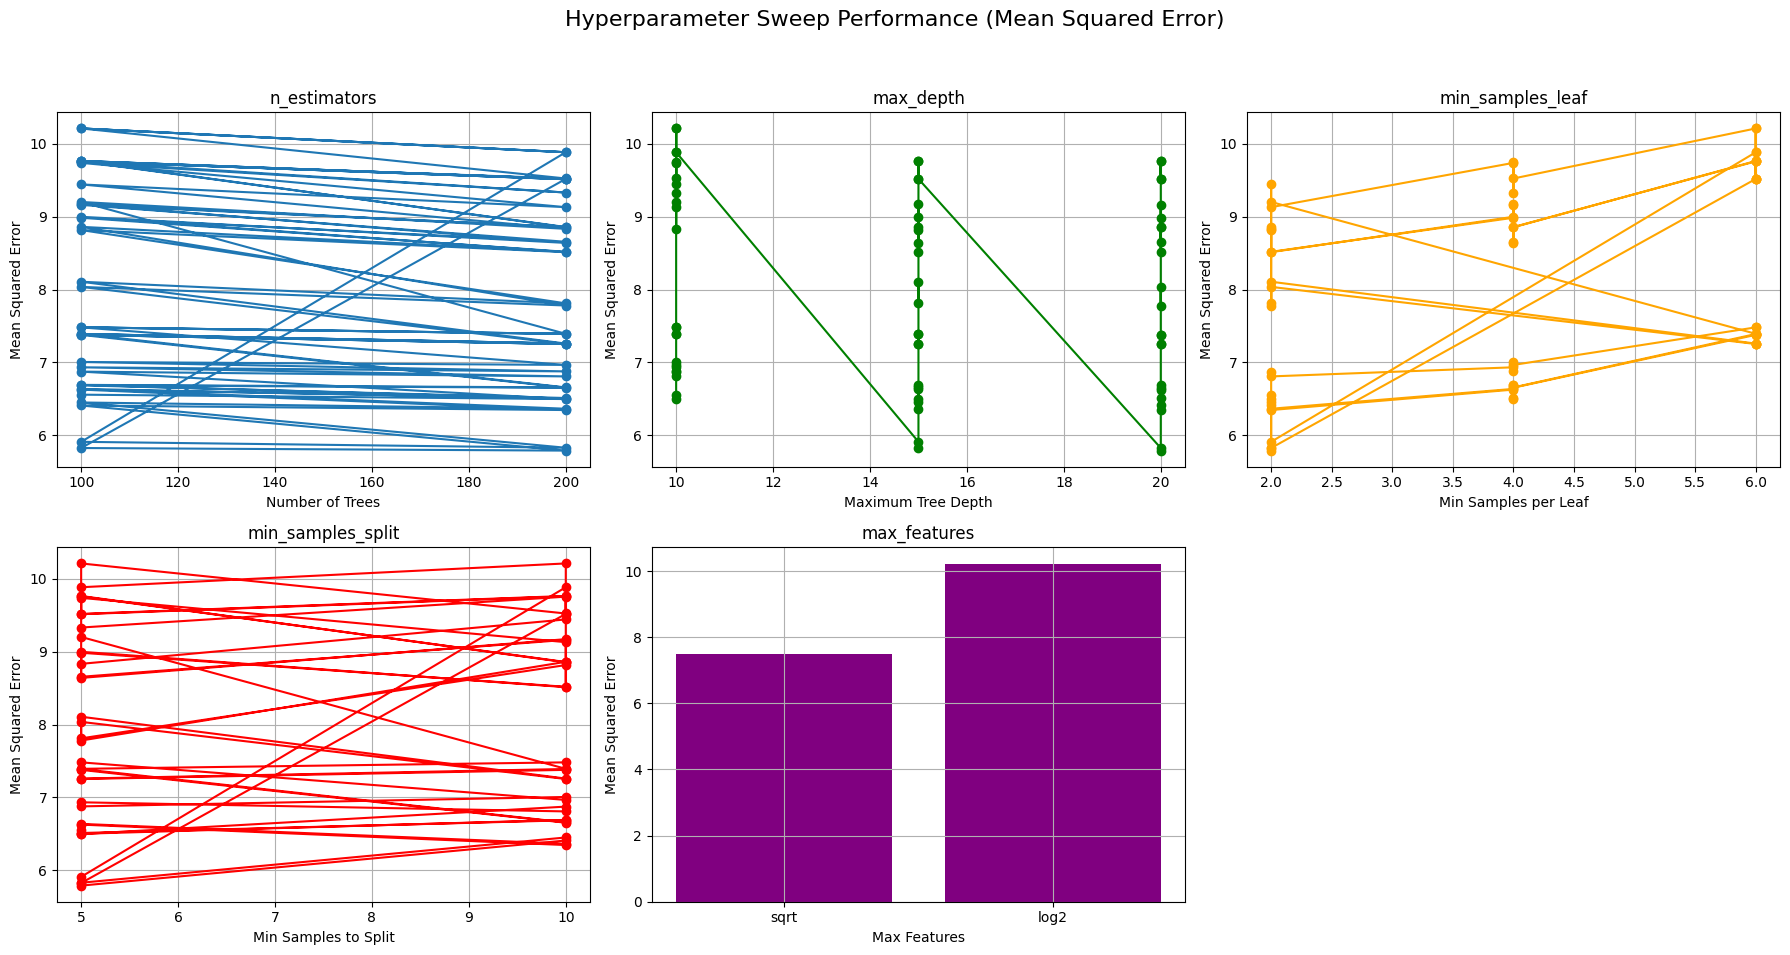

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load GridSearchCV results
results = pd.DataFrame(grid_search.cv_results_)

# Convert negative MSE to positive for readability
results['mean_MSE'] = -results['mean_test_score']

# Set up subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Hyperparameter Sweep Performance (Mean Squared Error)", fontsize=16)

# 1. n_estimators
axs[0, 0].plot(results['param_regressor__n_estimators'], results['mean_MSE'], marker='o')
axs[0, 0].set_title("n_estimators")
axs[0, 0].set_xlabel("Number of Trees")
axs[0, 0].set_ylabel("Mean Squared Error")
axs[0, 0].grid(True)

# 2. max_depth
axs[0, 1].plot(results['param_regressor__max_depth'], results['mean_MSE'], marker='o', color='green')
axs[0, 1].set_title("max_depth")
axs[0, 1].set_xlabel("Maximum Tree Depth")
axs[0, 1].set_ylabel("Mean Squared Error")
axs[0, 1].grid(True)

# 3. min_samples_leaf
axs[0, 2].plot(results['param_regressor__min_samples_leaf'], results['mean_MSE'], marker='o', color='orange')
axs[0, 2].set_title("min_samples_leaf")
axs[0, 2].set_xlabel("Min Samples per Leaf")
axs[0, 2].set_ylabel("Mean Squared Error")
axs[0, 2].grid(True)

# 4. min_samples_split
axs[1, 0].plot(results['param_regressor__min_samples_split'], results['mean_MSE'], marker='o', color='red')
axs[1, 0].set_title("min_samples_split")
axs[1, 0].set_xlabel("Min Samples to Split")
axs[1, 0].set_ylabel("Mean Squared Error")
axs[1, 0].grid(True)

# 5. max_features
axs[1, 1].bar(results['param_regressor__max_features'].astype(str), results['mean_MSE'], color='purple')
axs[1, 1].set_title("max_features")
axs[1, 1].set_xlabel("Max Features")
axs[1, 1].set_ylabel("Mean Squared Error")
axs[1, 1].grid(True)

# Hide the unused 6th subplot
axs[1, 2].axis('off')

# Layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
